<span style="color:#87cefa; font-size:150%">J_sat code</span> 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.ticker as mticker
from scipy.special import rel_entr
import pickle
from mpl_toolkits.mplot3d import axes3d
from scipy.ndimage.filters import gaussian_filter

import matplotlib.patches as patches

import Mesh_data
import Mesh_data_server


/tmp/ipykernel_62957/1067821576.py:8: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


In [2]:

co_new_mesh = np.load("./new_mesh_co_geo_mesh_center.npy")
co_new_mesh_x = np.load("./new_mesh_co_geo_mesh_x.npy")
co_new_mesh_y = np.load("./new_mesh_co_geo_mesh_y.npy")
co_newmesh_facing = np.load("./gs_new_mesh_co.npy")


al_new_mesh = np.load("./new_mesh_al_geo_mesh_center.npy")
al_new_mesh_x = np.load("./new_mesh_al_geo_mesh_x.npy")
al_new_mesh_y = np.load("./new_mesh_al_geo_mesh_y.npy")
al_newmesh_facing = np.load("./gs_new_mesh_al.npy")

e = 1.60217663*(10**(-19))

charge = []
charge.append(0)
charge.append(e*1)
charge.append(0)
charge.append(e*1)
charge.append(e*2)
charge.append(e*3)
charge.append(e*4)
charge.append(e*5)
charge.append(e*6)
charge.append(0)
charge.append(e*1)
charge.append(e*2)
charge.append(e*3)
charge.append(e*4)
charge.append(e*5)
charge.append(e*6)
charge.append(e*7)
charge.append(e*8)
charge.append(e*9)
charge.append(e*10)


In [3]:
np.shape(np.load("./qc_new_mesh_SAS.npy"))

(38, 98)

In [4]:
SAS_1e19_8MW = np.load("./data_sep_density/fch_b2fplasmf_SAS_8MW_1e19_8MW_Ne_0_sep_density.npy")
SAS_2e19_8MW = np.load("./data_sep_density/fch_b2fplasmf_SAS_8MW_2e19_8MW_Ne_0_sep_density.npy")
SAS_3e19_8MW = np.load("./data_sep_density/fch_b2fplasmf_SAS_8MW_3e19_8MW_Ne_0_sep_density.npy")
SAS_4e19_8MW = np.load("./data_sep_density/fch_b2fplasmf_SAS_8MW_4e19_8MW_Ne_0_sep_density.npy")
SAS_5e19_8MW = np.load("./data_sep_density/fch_b2fplasmf_SAS_8MW_5e19_8MW_Ne_0_sep_density.npy")


fna_SAS_1e18_8MW = np.load("./data_sep_density/fna_b2fplasmf_SAS_8MW_1e18_Ne_0_sep_density.npy")
fna_SAS_05e19_8MW = np.load("./data_sep_density/fna_b2fplasmf_SAS_8MW_05e19_Ne_0_sep_density.npy")
fna_SAS_1e19_8MW = np.load("./data_sep_density/fna_b2fplasmf_SAS_8MW_1e19_8MW_Ne_0_sep_density.npy")
fna_SAS_2e19_8MW = np.load("./data_sep_density/fna_b2fplasmf_SAS_8MW_2e19_8MW_Ne_0_sep_density.npy")
fna_SAS_3e19_8MW = np.load("./data_sep_density/fna_b2fplasmf_SAS_8MW_3e19_8MW_Ne_0_sep_density.npy")
fna_SAS_4e19_8MW = np.load("./data_sep_density/fna_b2fplasmf_SAS_8MW_4e19_8MW_Ne_0_sep_density.npy")
fna_SAS_5e19_8MW = np.load("./data_sep_density/fna_b2fplasmf_SAS_8MW_5e19_8MW_Ne_0_sep_density.npy")

J_SAS_1e18_8MW = np.zeros([20, 2, 38, 98])
J_SAS_05e19_8MW = np.zeros([20, 2, 38, 98])
J_SAS_1e19_8MW = np.zeros([20, 2, 38, 98])
J_SAS_2e19_8MW = np.zeros([20, 2, 38, 98])
J_SAS_3e19_8MW = np.zeros([20, 2, 38, 98])
J_SAS_4e19_8MW = np.zeros([20, 2, 38, 98])
J_SAS_5e19_8MW = np.zeros([20, 2, 38, 98])

geo_1e18 = ((np.load("./data_sep_density/bb_b2fplasmf_SAS_8MW_1e18_Ne_0_sep_density.npy")[3,1:,96])/(np.load("./data_sep_density/bb_b2fplasmf_SAS_8MW_1e18_Ne_0_sep_density.npy")[0,1:,96]))/(np.load("./qc_new_mesh_SAS.npy")[1:,96])
geo_05e19 =((np.load("./data_sep_density/bb_b2fplasmf_SAS_8MW_05e19_Ne_0_sep_density.npy")[3,1:,96])/(np.load("./data_sep_density/bb_b2fplasmf_SAS_8MW_05e19_Ne_0_sep_density.npy")[0,1:,96]))/(np.load("./qc_new_mesh_SAS.npy")[1:,96])
geo_1e19 = ((np.load("./data_sep_density/bb_b2fplasmf_SAS_8MW_1e19_8MW_Ne_0_sep_density.npy")[3,1:,96])/(np.load("./data_sep_density/bb_b2fplasmf_SAS_8MW_1e19_8MW_Ne_0_sep_density.npy")[0,1:,96]))/(np.load("./qc_new_mesh_SAS.npy")[1:,96])
geo_2e19 = ((np.load("./data_sep_density/bb_b2fplasmf_SAS_8MW_2e19_8MW_Ne_0_sep_density.npy")[3,1:,96])/(np.load("./data_sep_density/bb_b2fplasmf_SAS_8MW_2e19_8MW_Ne_0_sep_density.npy")[0,1:,96]))/(np.load("./qc_new_mesh_SAS.npy")[1:,96])
geo_3e19 = ((np.load("./data_sep_density/bb_b2fplasmf_SAS_8MW_3e19_8MW_Ne_0_sep_density.npy")[3,1:,96])/(np.load("./data_sep_density/bb_b2fplasmf_SAS_8MW_3e19_8MW_Ne_0_sep_density.npy")[0,1:,96]))/(np.load("./qc_new_mesh_SAS.npy")[1:,96])
geo_4e19 = ((np.load("./data_sep_density/bb_b2fplasmf_SAS_8MW_4e19_8MW_Ne_0_sep_density.npy")[3,1:,96])/(np.load("./data_sep_density/bb_b2fplasmf_SAS_8MW_4e19_8MW_Ne_0_sep_density.npy")[0,1:,96]))/(np.load("./qc_new_mesh_SAS.npy")[1:,96])
geo_5e19 = ((np.load("./data_sep_density/bb_b2fplasmf_SAS_8MW_5e19_8MW_Ne_0_sep_density.npy")[3,1:,96])/(np.load("./data_sep_density/bb_b2fplasmf_SAS_8MW_5e19_8MW_Ne_0_sep_density.npy")[0,1:,96]))/(np.load("./qc_new_mesh_SAS.npy")[1:,96])

for i in range(20):
    J_SAS_1e18_8MW[i,:,:,:] = fna_SAS_1e18_8MW[i,:,:,:]*charge[i] 
    J_SAS_05e19_8MW[i,:,:,:] = fna_SAS_05e19_8MW[i,:,:,:]*charge[i] 
    J_SAS_1e19_8MW[i,:,:,:] = fna_SAS_1e19_8MW[i,:,:,:]*charge[i]
    J_SAS_2e19_8MW[i,:,:,:] = fna_SAS_2e19_8MW[i,:,:,:]*charge[i]
    J_SAS_3e19_8MW[i,:,:,:] = fna_SAS_3e19_8MW[i,:,:,:]*charge[i]
    J_SAS_4e19_8MW[i,:,:,:] = fna_SAS_4e19_8MW[i,:,:,:]*charge[i]
    J_SAS_5e19_8MW[i,:,:,:] = fna_SAS_5e19_8MW[i,:,:,:]*charge[i]

J_SAS_1e18_8MW = np.sum(J_SAS_1e18_8MW,axis=0)
J_SAS_05e19_8MW = np.sum(J_SAS_05e19_8MW,axis=0)
J_SAS_1e19_8MW = np.sum(J_SAS_1e19_8MW,axis=0)
J_SAS_2e19_8MW = np.sum(J_SAS_2e19_8MW,axis=0)
J_SAS_3e19_8MW = np.sum(J_SAS_3e19_8MW,axis=0)
J_SAS_4e19_8MW = np.sum(J_SAS_4e19_8MW,axis=0)
J_SAS_5e19_8MW = np.sum(J_SAS_5e19_8MW,axis=0)




In [5]:
#co_1e19_8MW = np.load("./data_sep_density/fch_b2fplasmf_co_8MW_1e19_8MW_Ne_0_sep_density.npy")
#co_2e19_8MW = np.load("./data_sep_density/fch_b2fplasmf_co_8MW_2e19_8MW_Ne_0_sep_density.npy")
#co_3e19_8MW = np.load("./data_sep_density/fch_b2fplasmf_co_8MW_3e19_8MW_Ne_0_sep_density.npy")
#co_4e19_8MW = np.load("./data_sep_density/fch_b2fplasmf_co_8MW_4e19_8MW_Ne_0_sep_density.npy")
#co_5e19_8MW = np.load("./data_sep_density/fch_b2fplasmf_co_8MW_5e19_8MW_Ne_0_sep_density.npy")




fna_co_1e19_8MW = np.load("./data_sep_density/fna_b2fplasmf_co_8MW_1e19_8MW_Ne_0_sep_density.npy")
fna_co_2e19_8MW = np.load("./data_sep_density/fna_b2fplasmf_co_8MW_2e19_8MW_Ne_0_sep_density.npy")
fna_co_3e19_8MW = np.load("./data_sep_density/fna_b2fplasmf_co_8MW_3e19_8MW_Ne_0_sep_density.npy")
fna_co_4e19_8MW = np.load("./data_sep_density/fna_b2fplasmf_co_8MW_4e19_8MW_Ne_0_sep_density.npy")
fna_co_5e19_8MW = np.load("./data_sep_density/fna_b2fplasmf_co_8MW_5e19_8MW_Ne_0_sep_density.npy")

J_co_1e19_8MW = np.zeros([20, 2, 38, 98])
J_co_2e19_8MW = np.zeros([20, 2, 38, 98])
J_co_3e19_8MW = np.zeros([20, 2, 38, 98])
J_co_4e19_8MW = np.zeros([20, 2, 38, 98])
J_co_5e19_8MW = np.zeros([20, 2, 38, 98])

cgeo_1e19 = ((np.load("./data_sep_density/bb_b2fplasmf_co_8MW_1e19_8MW_Ne_0_sep_density.npy")[3,1:,96])/(np.load("./data_sep_density/bb_b2fplasmf_co_8MW_1e19_8MW_Ne_0_sep_density.npy")[0,1:,96]))/(np.load("./qc_new_mesh_co.npy")[1:,96])
cgeo_2e19 = ((np.load("./data_sep_density/bb_b2fplasmf_co_8MW_2e19_8MW_Ne_0_sep_density.npy")[3,1:,96])/(np.load("./data_sep_density/bb_b2fplasmf_co_8MW_2e19_8MW_Ne_0_sep_density.npy")[0,1:,96]))/(np.load("./qc_new_mesh_co.npy")[1:,96])
cgeo_3e19 = ((np.load("./data_sep_density/bb_b2fplasmf_co_8MW_3e19_8MW_Ne_0_sep_density.npy")[3,1:,96])/(np.load("./data_sep_density/bb_b2fplasmf_co_8MW_3e19_8MW_Ne_0_sep_density.npy")[0,1:,96]))/(np.load("./qc_new_mesh_co.npy")[1:,96])
cgeo_4e19 = ((np.load("./data_sep_density/bb_b2fplasmf_co_8MW_4e19_8MW_Ne_0_sep_density.npy")[3,1:,96])/(np.load("./data_sep_density/bb_b2fplasmf_co_8MW_4e19_8MW_Ne_0_sep_density.npy")[0,1:,96]))/(np.load("./qc_new_mesh_co.npy")[1:,96])
cgeo_5e19 = ((np.load("./data_sep_density/bb_b2fplasmf_co_8MW_5e19_8MW_Ne_0_sep_density.npy")[3,1:,96])/(np.load("./data_sep_density/bb_b2fplasmf_co_8MW_5e19_8MW_Ne_0_sep_density.npy")[0,1:,96]))/(np.load("./qc_new_mesh_co.npy")[1:,96])






for i in range(20):
    J_co_1e19_8MW[i,:,:,:] = fna_co_1e19_8MW[i,:,:,:]*charge[i]
    J_co_2e19_8MW[i,:,:,:] = fna_co_2e19_8MW[i,:,:,:]*charge[i]
    J_co_3e19_8MW[i,:,:,:] = fna_co_3e19_8MW[i,:,:,:]*charge[i]
    J_co_4e19_8MW[i,:,:,:] = fna_co_4e19_8MW[i,:,:,:]*charge[i]
    J_co_5e19_8MW[i,:,:,:] = fna_co_5e19_8MW[i,:,:,:]*charge[i]

J_co_1e19_8MW = np.sum(J_co_1e19_8MW,axis=0)
J_co_2e19_8MW = np.sum(J_co_2e19_8MW,axis=0)
J_co_3e19_8MW = np.sum(J_co_3e19_8MW,axis=0)
J_co_4e19_8MW = np.sum(J_co_4e19_8MW,axis=0)
J_co_5e19_8MW = np.sum(J_co_5e19_8MW,axis=0)




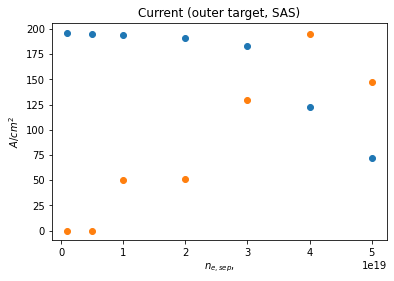

In [12]:
target_SAS = []
target_SAS_fna = [] 

target_SAS.append(np.max((J_SAS_1e18_8MW[0,1:,96])*geo_1e18/(al_newmesh_facing[0,1:,96]*10000)))
target_SAS.append(np.max((J_SAS_05e19_8MW[0,1:,96])*geo_05e19/(al_newmesh_facing[0,1:,96]*10000)))
target_SAS.append(np.max((J_SAS_1e19_8MW[0,1:,96])*geo_1e19/(al_newmesh_facing[0,1:,96]*10000)))
target_SAS.append(np.max((J_SAS_2e19_8MW[0,1:,96])*geo_2e19/(al_newmesh_facing[0,1:,96]*10000)))
target_SAS.append(np.max((J_SAS_3e19_8MW[0,1:,96])*geo_3e19/(al_newmesh_facing[0,1:,96]*10000)))
target_SAS.append(np.max((J_SAS_4e19_8MW[0,1:,96])*geo_4e19/(al_newmesh_facing[0,1:,96]*10000)))
target_SAS.append(np.max((J_SAS_5e19_8MW[0,1:,96])*geo_5e19/(al_newmesh_facing[0,1:,96]*10000)))

x_axis = [1.0*10**18,0.5*10**19,1*10**19,2*10**19,3*10**19,4*10**19,5*10**19]

target_co = [0]
target_co.append(0)
target_co_fna = [] 

target_co.append(np.max((J_co_1e19_8MW[0,1:,96])*cgeo_1e19/(co_newmesh_facing[0,1:,96]*10000)))
target_co.append(np.max((J_co_2e19_8MW[0,1:,96])*cgeo_2e19/(co_newmesh_facing[0,1:,96]*10000)))
target_co.append(np.max((J_co_3e19_8MW[0,1:,96])*cgeo_3e19/(co_newmesh_facing[0,1:,96]*10000)))
target_co.append(np.max((J_co_4e19_8MW[0,1:,96])*cgeo_4e19/(co_newmesh_facing[0,1:,96]*10000)))
target_co.append(np.max((J_co_5e19_8MW[0,1:,96])*cgeo_5e19/(co_newmesh_facing[0,1:,96]*10000)))




plt.title(r"Current (outer target, SAS)")
plt.xlabel(r"$n_{e, sep}, $")
plt.ylabel(r"$A/cm^2$")
plt.scatter(x_axis, target_SAS)
plt.scatter(x_axis, target_co)
    
plt.savefig("./Plots/SAS_densityscan_8MW.png")
plt.show()

In [1]:
0.1+0.2 ==0.3

False

In [2]:
0.1+0.2==0.3

False

In [3]:
0.1+0.2==0.3

False

ValueError: x and y must be the same size

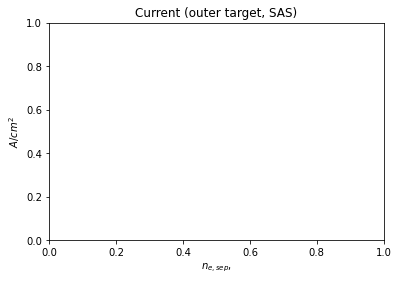

In [ ]:

plt.figure(figsize=(8, 8))


plt.axes().set_aspect('equal')

plt.title("Poloidal Current")
plt.xlim(1.2,1.6)
plt.ylim(-1.4,-0.6)
plt.pcolormesh(Mesh_data.al_new_mesh_x_cen, Mesh_data.al_new_mesh_y_cen, SAS_1e19_8MW[0,:,:])
plt.colorbar()
plt.show()

In [ ]:
plt.plot(ne_SAS_1e19[18,:])
plt.hlines(10**19,1,90)
plt.show()

In [ ]:
np.max(np.load("./data_Heating_Geo/fch_b2fplasmf_SAS_8MW_noNe.npy")[0,1:,96])

In [ ]:
np.shape(np.load("./qc_new_mesh_SAS.npy"))

In [ ]:
np.max((SAS_1e19_8MW[0,1:,96])/(al_newmesh_facing[0,1:,96]*10000))